In [9]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)

(512, 30) (57, 30)
(409, 30) (103, 30)


In [24]:
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
y_hat = model.predict(X_val)

In [25]:
print(f'Accuracy: {accuracy_score(y_val, y_hat)*100 : .3f}%')

Accuracy:  95.370%


In [33]:
y_hat = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_hat)*100 : .3f}%')

Accuracy:  98.246%


### Multiclass classification & Harness Test

In [2]:
digits = load_digits()
# digits

In [3]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

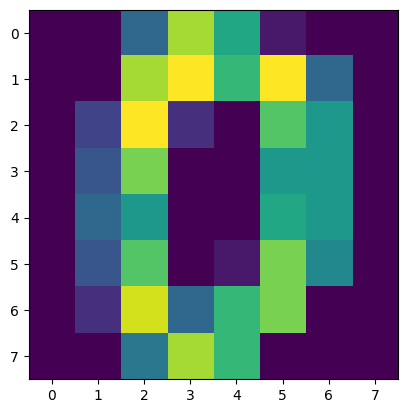

In [4]:
plt.imshow(digits.images[0])

In [5]:
X = digits.data
y = digits.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)

(1617, 64) (180, 64)
(1293, 64) (324, 64)


In [11]:
classifiers = {
    'Dummy': DummyClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    print(f'{name : >20}: {accuracy_score(y_val, y_hat)*100 : .3f}%')

               Dummy:  7.099%
          KNeighbors:  98.148%
       Decision Tree:  85.185%
 Logistic Regression:  95.370%
                 SVM:  98.457%


In [ ]:
# choose 2 or 3 having best accuracy --> hyperparameter tunning

In [12]:
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'{k} --> {knn.score(X_val, y_val)*100 : .5f} %')

1 -->  98.14815 %
2 -->  98.45679 %
3 -->  99.07407 %
4 -->  98.45679 %
5 -->  98.14815 %
6 -->  98.14815 %
7 -->  97.83951 %
8 -->  97.83951 %
9 -->  97.83951 %
10 -->  97.22222 %
11 -->  97.83951 %
12 -->  97.53086 %
13 -->  97.22222 %
14 -->  96.91358 %
15 -->  97.22222 %
16 -->  96.60494 %
17 -->  96.60494 %
18 -->  96.60494 %
19 -->  96.91358 %


In [ ]:
# svm -> tuning

In [17]:
final_model = KNeighborsClassifier(n_neighbors=3)
final_model.fit(X_train, y_train)
print(f'{k} --> {final_model.score(X_test, y_test)*100 : .5f} %')

19 -->  98.88889 %
